In [2]:
import requests
from bs4 import BeautifulSoup
import csv
import codecs
import pandas as pd
from collections import OrderedDict

In [128]:
zwmcs = []
gsmcs = []
zwyxs = []
def get_basic_information(urls):
    for url in urls:
        r = requests.get(url)
        page = BeautifulSoup(r.text, "lxml")
        for i in page.find_all('td', class_="zwmc"):
            zwmc = i.text.strip()
            zwmcs.append(zwmc)
        for i in page.find_all('td', class_="gsmc"):
            gsmc = i.text.strip()
            gsmcs.append(gsmc)
        for i in page.find_all('td', class_="zwyx"):
            zwyx = i.text.strip()
            zwyxs.append(zwyx)
    jobs = OrderedDict()
    jobs['职位名称'] = zwmcs
    jobs['公司名称'] = gsmcs
    jobs['职位月薪'] = zwyxs
    header = jobs.keys()
    rows= pd.DataFrame(jobs).to_dict('records')

    with codecs.open('zhilian.csv', 'w', 'gbk') as f:
        f.write(','.join(header))
        f.write('\n')
        for data in rows:
            f.write(",".join(str(data[h]) for h in header))
            f.write('\n')
    return jobs

In [129]:
urls = ['http://sou.zhaopin.com/jobs/searchresult.ashx?in=300500&jl=%E6%9D%AD%E5%B7%9E&sm=0&el=4&we=-1&isfilter=1&bj=2071000&sg=e8078f0e56ec4d41a7ed3315fd2a2dbb&p={}'.format(str(i))for i in range(1,3)]
get_basic_information(urls)

OrderedDict([('职位名称',
              ['公司客户经理（正式）',
               '高薪直聘业务副总',
               '风险经理',
               '零售产品经理（产品创设）',
               '同业客户经理',
               '托管产品经理',
               '理财经理',
               '投行产品经理',
               '票据产品经理',
               '清收保全岗',
               '投资顾问',
               '营业部总经理（湖州/衢州/上虞/丽水）',
               '营业担当-针对18年应届毕业生',
               '银行渠道经理（可以不考勤）',
               '风控经理',
               '通用类岗位（测试职位请勿投递）',
               '分行业务培训生',
               '运营类职位',
               '属地资产管理岗（杭州）(003969)',
               '风险督察',
               '管理培训生 （营销管理类-直营）',
               '综合柜员',
               '银行行政助理',
               'Teller CORP Counter Hangzhou',
               '寿险专员',
               '银行行政助理（质检）',
               '上饶银行2018春季校园招聘.',
               '丰盛理财中心经理',
               '对公机构业务高级客户经理（助理副总裁）',
               '渠道征信主任（杭州）',
               '（资深）丰盛理财经理',
               '银行渠道专员',
               '商务管理',
               '业务主任',
               '

In [115]:
from lxml import etree
def get_links(urls):
    links = []
    for url in urls:
        r = requests.get(url)
        page = etree.HTML(r.text)
        for i in page.xpath('//td[@class="zwmc"]//a/@href'):
            links.append(i)
    return links
urls = ['http://sou.zhaopin.com/jobs/searchresult.ashx?in=300500&jl=%E6%9D%AD%E5%B7%9E&sm=0&el=4&we=-1&isfilter=1&bj=2071000&sg=e8078f0e56ec4d41a7ed3315fd2a2dbb&p={}'.format(str(i))for i in range(1,3)]
get_links(urls)

['http://jobs.zhaopin.com/145645765250102.htm',
 'http://jobs.zhaopin.com/CC581299920J00103118601.htm',
 'http://jobs.zhaopin.com/145645765250136.htm',
 'http://jobs.zhaopin.com/145645765250135.htm',
 'http://jobs.zhaopin.com/145645765250122.htm',
 'http://jobs.zhaopin.com/145645765250126.htm',
 'http://jobs.zhaopin.com/145645765250127.htm',
 'http://jobs.zhaopin.com/419382985250036.htm',
 'http://jobs.zhaopin.com/145645765250130.htm',
 'http://jobs.zhaopin.com/145645765250137.htm',
 'http://jobs.zhaopin.com/145645765250133.htm',
 'http://jobs.zhaopin.com/419382985250067.htm',
 'http://jobs.zhaopin.com/145666892250086.htm',
 'http://jobs.zhaopin.com/465191333250029.htm',
 'http://jobs.zhaopin.com/644774524250154.htm',
 'http://xiaoyuan.zhaopin.com/job/CC000111947J90000080000',
 'http://xiaoyuan.zhaopin.com/job/CC000119661J90000048000',
 'http://xiaoyuan.zhaopin.com/job/CC000119661J90000047000',
 'http://jobs.zhaopin.com/133037278256884.htm',
 'http://jobs.zhaopin.com/120608070259079.ht

In [116]:
gzjys = []
for i in get_links(urls):
    r = requests.get(i)
    page = etree.HTML(r.text)
    for i in page.xpath('//div[@class="terminalpage-left"]//ul[@class="terminal-ul clearfix"]/li[5]//strong'):
        gzjy = i.text.strip()
        gzjys.append(gzjy)
print(gzjys)

['3-5年', '5-10年', '3-5年', '1-3年', '1-3年', '3-5年', '3-5年', '不限', '1-3年', '1-3年', '3-5年', '5-10年', '不限', '3-5年', '3-5年', '1年以下', '不限', '无经验', '1-3年', '1-3年', '不限', '不限', '不限', '不限', '5-10年', '5-10年', '1-3年', '1-3年', '不限', '不限', '1-3年', '1-3年', '3-5年', '3-5年', '1-3年', '不限', '3-5年', '3-5年', '3-5年', '1-3年', '3-5年', '不限', '不限', '3-5年', '5-10年', '3-5年', '3-5年', '不限', '不限', '5-10年', '5-10年', '3-5年', '1-3年', '3-5年', '3-5年', '1-3年', '不限', '不限', '不限', '不限', '1-3年', '不限', '1-3年', '不限', '不限', '1-3年', '1-3年', '3-5年', '1-3年', '1-3年', '不限', '无经验', '不限', '1-3年', '1-3年', '3-5年', '不限', '不限', '5-10年', '3-5年', '3-5年', '不限', '3-5年', '不限', '不限', '不限', '1-3年', '不限', '1-3年', '1-3年', '不限', '1-3年', '1-3年', '3-5年', '3-5年', '1-3年', '3-5年']


In [117]:
len(gzjys)

97

In [118]:
len(get_links(urls))

100

In [119]:
gzjys.insert(15, '不限')

In [120]:
gzjys.insert(15, '不限')

In [121]:
gzjys.insert(15, '不限')

In [122]:
len(gzjys)

100

In [130]:
import codecs
import pandas as pd
from collections import OrderedDict
jobs = OrderedDict()
jobs['职位名称'] = zwmcs
jobs['公司名称'] = gsmcs
jobs['职位月薪'] = zwyxs
jobs['工作经验'] = gzjys
header = jobs.keys()
rows= pd.DataFrame(jobs).to_dict('records')

with codecs.open('zhilian.csv', 'w', 'gbk') as f:
    f.write(','.join(header))
    f.write('\n')
    for data in rows:
        f.write(",".join(str(data[h]) for h in header))
        f.write('\n')

In [9]:
df = pd.read_csv('zhilian-csv.csv')

In [10]:
df

,职位名称,公司名称,职位月薪,工作经验
0,公司客户经理（正式）,招商银行股份有限公司杭州分行,10001-15000,3-5年
1,高薪直聘业务副总,CBC(北京)信用管理有限公司杭州分公司,15001-20000,5-10年
2,风险经理,招商银行股份有限公司杭州分行,10000-15000,3-5年
3,零售产品经理（产品创设）,招商银行股份有限公司杭州分行,15001-20000,1-3年
4,同业客户经理,招商银行股份有限公司杭州分行,10001-15000,1-3年
5,托管产品经理,招商银行股份有限公司杭州分行,15001-20000,3-5年
6,理财经理,北京恒天明泽基金销售有限公司杭州分公司,10001-15000,3-5年
7,投行产品经理,招商银行股份有限公司杭州分行,15001-20000,不限
8,票据产品经理,招商银行股份有限公司杭州分行,15001-20000,1-3年
9,清收保全岗,招商银行股份有限公司杭州分行,8000-10000,1-3年


In [11]:
df['公司名称'].value_counts()

招商银行股份有限公司杭州分行            10
浙江民泰商业银行股份有限公司             7
北京恒天明泽基金销售有限公司杭州分公司        6
浙江稠州商业银行股份有限公司             5
中国光大银行杭州分行                 5
金华银行股份有限公司杭州分行             4
平安普惠投资咨询有限公司杭州教工路分公司       4
杭州鑫合汇互联网金融服务有限公司           4
杭州银雁金融配套服务有限公司金华分公司        3
江苏银行股份有限公司杭州分行             3
平安普惠企业管理有限公司浙江分公司          3
华侨基金管理有限公司                 3
星展银行(中国)有限公司               3
杭州冰川投资管理有限公司               3
招商信诺人寿保险有限公司               2
广发银行股份有限公司信用卡中心            2
兴业银行杭州分行                   1
交通银行太平洋信用卡中心               1
中新力合股份有限公司                 1
杭州惠超房地产代理有限公司              1
三井住友银行(中国)有限公司杭州分行         1
浙江联合中小企业财富管理有限公司           1
平安普惠投资咨询有限公司杭州莫干山路分公司      1
兴业银行股份有限公司杭州清泰支行           1
杭州常裕金融控股集团有限公司             1
杭州铜板街网络科技有限公司              1
CBC(北京)信用管理有限公司杭州分公司       1
平安银行股份有限公司温州分行             1
浙江中睿担保有限公司                 1
杭州联合农村商业银行股份有限公司           1
青岛联信商务咨询有限公司杭州分公司          1
上饶银行股份有限公司                 1
杭州联合资信评估咨询有限公司             1
上海友而信市场信息咨询有限公司杭州第二分公司     1
Name: 公司名称, dt

In [100]:
def split_salary(i):
    try:
        splt = i.split('-',1)
        first = float(splt[0])
        second = float(splt[1])
        return int((first+second)/2)
    except:
        return float(i)
df['月薪平均'] = df['职位月薪'].apply(split_salary)

In [34]:
del df['月薪估计']

In [35]:
df

,职位名称,公司名称,职位月薪,工作经验,月薪平均
0,公司客户经理（正式）,招商银行股份有限公司杭州分行,10001-15000,3-5年,12500
1,高薪直聘业务副总,CBC(北京)信用管理有限公司杭州分公司,15001-20000,5-10年,17500
2,风险经理,招商银行股份有限公司杭州分行,10000-15000,3-5年,12500
3,零售产品经理（产品创设）,招商银行股份有限公司杭州分行,15001-20000,1-3年,17500
4,同业客户经理,招商银行股份有限公司杭州分行,10001-15000,1-3年,12500
5,托管产品经理,招商银行股份有限公司杭州分行,15001-20000,3-5年,17500
6,理财经理,北京恒天明泽基金销售有限公司杭州分公司,10001-15000,3-5年,12500
7,投行产品经理,招商银行股份有限公司杭州分行,15001-20000,不限,17500
8,票据产品经理,招商银行股份有限公司杭州分行,15001-20000,1-3年,17500
9,清收保全岗,招商银行股份有限公司杭州分行,8000-10000,1-3年,9000


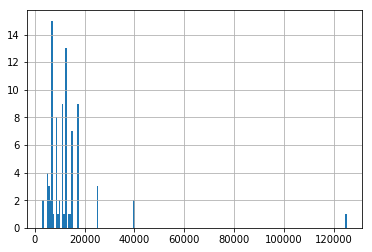

In [47]:
df['月薪平均'].hist(bins = 200)

In [48]:
df['月薪平均'].value_counts()

7000      15
12500     13
17500      9
11500      9
9000       8
15000      7
5000       4
6000       3
25000      3
10000      2
6150       2
3000       2
40000      2
14500      1
9500       1
7750       1
125000     1
12000      1
13500      1
Name: 月薪平均, dtype: int64

In [49]:
df['月薪平均'].mean()

13165.29411764706

In [50]:
df['月薪平均'].median()

11500.0

In [51]:
df['月薪平均'].max()

125000

In [52]:
df['月薪平均'].min()

3000

In [57]:
df[df['月薪平均'] == 125000]

,职位名称,公司名称,职位月薪,工作经验,月薪平均
39,财富中心总经理,华侨基金管理有限公司,100001-150000,5-10年,125000


In [58]:
df[df['月薪平均'] == 3000]

,职位名称,公司名称,职位月薪,工作经验,月薪平均
18,银行行政助理,招商信诺人寿保险有限公司,2001-4000,1-3年,3000
19,银行行政助理（质检）,招商信诺人寿保险有限公司,2001-4000,不限,3000


In [72]:
import matplotlib.pyplot as plt

Text(0,0.5,'salary')

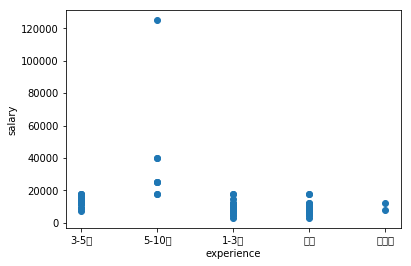

In [117]:
experience = df['工作经验']
salary = df['月薪平均']
plt.scatter(experience, salary)
plt.axis()
plt.xlabel("experience")
plt.ylabel("salary")

In [118]:
df[(df['月薪平均'] > 8000) & ((df['工作经验'] == '不限') | (df['工作经验'] == '无经验'))]

,职位名称,公司名称,职位月薪,工作经验,月薪平均
7,投行产品经理,招商银行股份有限公司杭州分行,15001-20000,不限,17500
20,上饶银行2018春季校园招聘.,上饶银行股份有限公司,8001-10000,不限,9000
30,授信审查岗,浙江民泰商业银行股份有限公司,10000-15000,不限,12500
36,存款管理岗,浙江民泰商业银行股份有限公司,10000-15000,不限,12500
37,小微评审岗,杭州联合农村商业银行股份有限公司,8000-15000,不限,11500
42,高级团队长,北京恒天明泽基金销售有限公司杭州分公司,15001-20000,不限,17500
52,催收专员,平安普惠投资咨询有限公司杭州教工路分公司,8000-12000,不限,10000
53,风控专员,平安普惠投资咨询有限公司杭州教工路分公司,8000-12000,不限,10000
59,客服 非销售,平安普惠投资咨询有限公司杭州教工路分公司,7000-12000,不限,9500
60,2018届春季校园招聘（杭州分行）,江苏银行股份有限公司杭州分行,10001-15000,无经验,12500


In [120]:
df[df['月薪平均'] < 6000]

,职位名称,公司名称,职位月薪,工作经验,月薪平均
15,风险督察,交通银行太平洋信用卡中心,4001-6000,不限,5000
18,银行行政助理,招商信诺人寿保险有限公司,2001-4000,1-3年,3000
19,银行行政助理（质检）,招商信诺人寿保险有限公司,2001-4000,不限,3000
49,信用分析师,杭州联合资信评估咨询有限公司,4001-6000,1-3年,5000
70,兴业银行信用卡行政助理,兴业银行杭州分行,4001-6000,不限,5000
74,客户经理,兴业银行股份有限公司杭州清泰支行,4001-6000,1-3年,5000


In [110]:
df[df['职位名称'].str.contains('行政')]

,职位名称,公司名称,职位月薪,工作经验,月薪平均
18,银行行政助理,招商信诺人寿保险有限公司,2001-4000,1-3年,3000
19,银行行政助理（质检）,招商信诺人寿保险有限公司,2001-4000,不限,3000
70,兴业银行信用卡行政助理,兴业银行杭州分行,4001-6000,不限,5000


In [113]:
df[df['公司名称'].str.contains('江苏银行')]

,职位名称,公司名称,职位月薪,工作经验,月薪平均
48,财私顾问（零售业务部财富中心）,江苏银行股份有限公司杭州分行,10001-15000,3-5年,12500
60,2018届春季校园招聘（杭州分行）,江苏银行股份有限公司杭州分行,10001-15000,无经验,12500
69,支行业务发展部经理或副经理,江苏银行股份有限公司杭州分行,10000-20000,3-5年,15000


In [124]:
df['月薪平均'].std()

13840.75465774169

In [147]:
df[df['工作经验'] == '3-5年'].sort_values(by='月薪平均')

,职位名称,公司名称,职位月薪,工作经验,月薪平均
64,分支机构综合管理部综合管理岗,金华银行股份有限公司杭州分行,6001-8000,3-5年,7000
13,银行渠道经理（可以不考勤）,杭州惠超房地产代理有限公司,8001-10000,3-5年,9000
40,风险审查岗（尽调）,杭州鑫合汇互联网金融服务有限公司,8001-10000,3-5年,9000
33,风险审查岗（审批）,杭州鑫合汇互联网金融服务有限公司,8001-10000,3-5年,9000
81,项目管理岗,浙江稠州商业银行股份有限公司,8000-15000,3-5年,11500
45,风控法务经理,杭州常裕金融控股集团有限公司,8000-15000,3-5年,11500
84,信贷/小贷/企业贷主管,杭州冰川投资管理有限公司,8000-16000,3-5年,12000
48,财私顾问（零售业务部财富中心）,江苏银行股份有限公司杭州分行,10001-15000,3-5年,12500
41,高级理财经理,北京恒天明泽基金销售有限公司杭州分公司,10001-15000,3-5年,12500
82,高级理财经理,北京恒天明泽基金销售有限公司杭州分公司,10001-15000,3-5年,12500


In [128]:
df[df['工作经验'] == '3-5年'].mean()

月薪平均    13076.923077
dtype: float64

In [129]:
df[df['工作经验'] == '3-5年'].median()

月薪平均    12500.0
dtype: float64

In [148]:
df[df['工作经验'] == '1-3年'].sort_values(by='月薪平均')

,职位名称,公司名称,职位月薪,工作经验,月薪平均
18,银行行政助理,招商信诺人寿保险有限公司,2001-4000,1-3年,3000
49,信用分析师,杭州联合资信评估咨询有限公司,4001-6000,1-3年,5000
74,客户经理,兴业银行股份有限公司杭州清泰支行,4001-6000,1-3年,5000
63,风险经理,金华银行股份有限公司杭州分行,6001-8000,1-3年,7000
62,信贷内勤,金华银行股份有限公司杭州分行,6001-8000,1-3年,7000
58,柜员,中国光大银行杭州分行,6001-8000,1-3年,7000
57,柜员,中国光大银行杭州分行,6001-8000,1-3年,7000
55,柜员,中国光大银行杭州分行,6001-8000,1-3年,7000
34,项目经理,杭州鑫合汇互联网金融服务有限公司,6001-8000,1-3年,7000
29,商户支持中心专员,杭州铜板街网络科技有限公司,5000-9000,1-3年,7000


In [139]:
df[df['工作经验'] == '1-3年'].mean()

月薪平均    9388.888889
dtype: float64

In [140]:
df[df['工作经验'] == '1-3年'].median()

月薪平均    9000.0
dtype: float64

In [146]:
df[(df['工作经验'] == '1-3年') & (df['月薪平均'] > 9000)]

,职位名称,公司名称,职位月薪,工作经验,月薪平均
3,零售产品经理（产品创设）,招商银行股份有限公司杭州分行,15001-20000,1-3年,17500
4,同业客户经理,招商银行股份有限公司杭州分行,10001-15000,1-3年,12500
8,票据产品经理,招商银行股份有限公司杭州分行,15001-20000,1-3年,17500
24,（资深）丰盛理财经理,星展银行(中国)有限公司,10001-15000,1-3年,12500
25,业务主任,平安普惠投资咨询有限公司杭州莫干山路分公司,8000-15000,1-3年,11500
46,对公风险经理,中国光大银行杭州分行,10000-19000,1-3年,14500
51,零售客户经理,中国光大银行杭州分行,8000-15000,1-3年,11500
76,大数据开发岗,浙江稠州商业银行股份有限公司,8000-15000,1-3年,11500
77,风险系统开发岗,浙江稠州商业银行股份有限公司,8000-15000,1-3年,11500
79,互联网开发岗,浙江稠州商业银行股份有限公司,8000-15000,1-3年,11500
